<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes 

Laura Andrea Roncancio Pava - ID 201815179 
  
**Dataset:** AirBnb Listings - Rome, Lazio, Italy[[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Rome. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.



In [180]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [182]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")

In [183]:
# Showing dataframe dimensions
listings_df.shape

(34061, 75)

In [184]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [185]:
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
917,1686289,https://www.airbnb.com/rooms/1686289,20240911015540,2024-09-12,city scrape,Trastevere amazing private terrace,Characteristic penthouse with an amazing 'priv...,NaN,https://a0.muscache.com/pictures/28953144/40a2...,8913733,https://www.airbnb.com/users/show/8913733,Marianna,2013-09-18,"Rome, Italy","36 years old, I live in Rome and i work for th...",within a few hours,100%,76%,f,https://a0.muscache.com/im/users/8913733/profi...,https://a0.muscache.com/im/users/8913733/profi...,Trastevere,1,1,"['email', 'phone']",t,t,NaN,I Centro Storico,NaN,41.89387,12.46526,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hair dryer"", ""Washer"", ""Shampoo"", ""Paid park...",$180.00,4,100,3,4,100,100,4.0,100.0,NaN,t,6,8,25,199,2024-09-12,141,16,1,2014-03-08,2024-08-23,4.88,4.88,4.77,4.80,4.88,4.89,4.77,NaN,f,1,1,0,0,1.10
3227,7702459,https://www.airbnb.com/rooms/7702459,20240911015540,2024-09-11,city scrape,Your Home @ Rome near trastevere,"""Your Home @ ROME"" is a cozy apartment just fe...","The apartment is located in Marconi area, a sh...",https://a0.muscache.com/pictures/471d6fab-0934...,40460298,https://www.airbnb.com/users/show/40460298,Mariangela,2015-08-04,"Rome, Italy",""".. ok adesso sono stanca, andiamo a casa!"" è ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/ec351...,https://a0.muscache.com/im/pictures/user/ec351...,Portuense,1,1,"['email', 'phone']",t,t,"Rome, Lazio, Italy",XI Arvalia/Portuense,NaN,41.86958,12.46842,Entire condo,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Oven"", ""Paid parking on premises"", ""Smoke al...",$99.00,3,30,3,3,30,30,3.0,30.0,NaN,t,3,15,45,126,2024-09-11,173,30,1,2016-03-30,2024-08-30,4.98,4.97,4.97,4.96,4.98,4.67,4.88,IT058091C2BWNKTZXD,f,1,1,0,0,1.68
6049,17584822,https://www.airbnb.com/rooms/17584822,20240911015540,2024-09-12,city scrape,Navona Hi-Tech Apartment,Luxury 1 bedroom/1 bath modern apartment with ...,The apartment is located in the heart of Rome ...,https://a0.muscache.com/pictures/cbdcb886-e562...,103354087,https://www.airbnb.com/users/show/103354087,Maria Luisa,2016-11-11,"Bari, Italy","Hello,\r\nmy name is Maria Luisa I’m a lawyer ...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/c05f6...,https://a0.muscache.com/im/pictures/user/c05f6...,Ponte,1,1,"['email', 'phone']",t,t,"Rome, Lazio, Italy",I Centro Storico,NaN,41.89957,12.46776,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Microwave"", ""Dishwasher"", ""Hair dryer"", ""Bid...",$123.00,3,10,2,3,1125,1125,3.0,1125.0,NaN,t,4,4,30,305,2024-09-12,145,35,2,2017-04-11,2024-09-09,4.87,4.91,4.89,4.92,4.98,4.96,4.78,ATR-001324-7,f,1,1,0,0,1.60
29629,113911602

Punto 2
En este dataframe tiene información relevante para el modelo de negocio de airbnb, en este caso para la ciudad de Roma, Italia. Incluye atributos como el vencindario, la calificación, los tipos de inmueble, el precio, entre otros.
Como se puede ver en el resultado de dimensiones del código, se tienen 75 columnas (las cuales tienen tipos de datos enteros, flotantes y objetos) con los atributos como los mencionados anteriormente y 34.061 filas.
Para el análisis solicitado, se usarán como variables más influyentes el vecindario (neighbourhood_cleanset), el precio (price), el tipo de inmueble (room type), la acomodación (accomodates) y las calificaciones (review_scores_rating).
A continuación, se justificará el uso de cada variable y su comportamiento.

## 2. Univariate analysis

In [186]:
# Showing the number of unique values of listing ids (This can be helpful to diagnose duplicity)
# El resultado demuestra que no tenemos duplicados en el dataframe ya que corresponde al mismo número de filas inicial.
listings_df["id"].nunique()

34061

In [187]:
# Showing unique values of neighbourhoods
listings_df["neighbourhood_cleansed"].unique()

array(['VIII Appia Antica', 'I Centro Storico', 'II Parioli/Nomentano',
       'XII Monte Verde', 'XIII Aurelia', 'V Prenestino/Centocelle',
       'VII San Giovanni/Cinecittà', 'IV Tiburtina', 'XIV Monte Mario',
       'III Monte Sacro', 'XV Cassia/Flaminia', 'VI Roma delle Torri',
       'X Ostia/Acilia', 'IX Eur', 'XI Arvalia/Portuense'], dtype=object)

El vecindario es un aspecto muy importante a tener en cuenta, ya que, por un lado a los usuarios les interesa qué tan cerca es de los sitios turísticos, si es esteticamente agradable y qué tan seguro es, y al inversionista le interesa cuánto cuesta una propiedad en esta ubicación a diferencia de otros vecindarios.
Como se puede apreciar en la línea anterior del código, se tienen 15 vecindarios.
Tipo de dato: objeto (texto)

In [188]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

room_type
Entire home/apt    0.731394
Private room       0.249435
Hotel room         0.014591
Shared room        0.004580
Name: proportion, dtype: float64

La segunda variable a tener en cuenta es el tipo de inmueble a ofrecer, esto es fundamental para que el inversionista defina qué tipo de propiedad comprar y tenga en cuenta los costos que esta le va a generar, así mismo, le ayuda a diferenciar si al tener una casa, le es más rentable alquilarla entera u ofrecer el servicio de habitaciones privadas.
Como se puede ver en la línea anterior, las casas, unidades enteras o apartamentos representan aproximadamente el 73% de los alquileres, mientras que las habitaciones privadas corresponden aproximadamente a 24%, las habitaciones de hotel solamente al 1% aproximadamente y las habitaciones compartidas al 0,4% aproximadamente.
Tipo de dato: flotante

In [189]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    34061.000000
mean         3.742756
std          2.001996
min          1.000000
5%           2.000000
25%          2.000000
50%          4.000000
75%          4.000000
95%          7.000000
max         16.000000
Name: accommodates, dtype: float64

[]

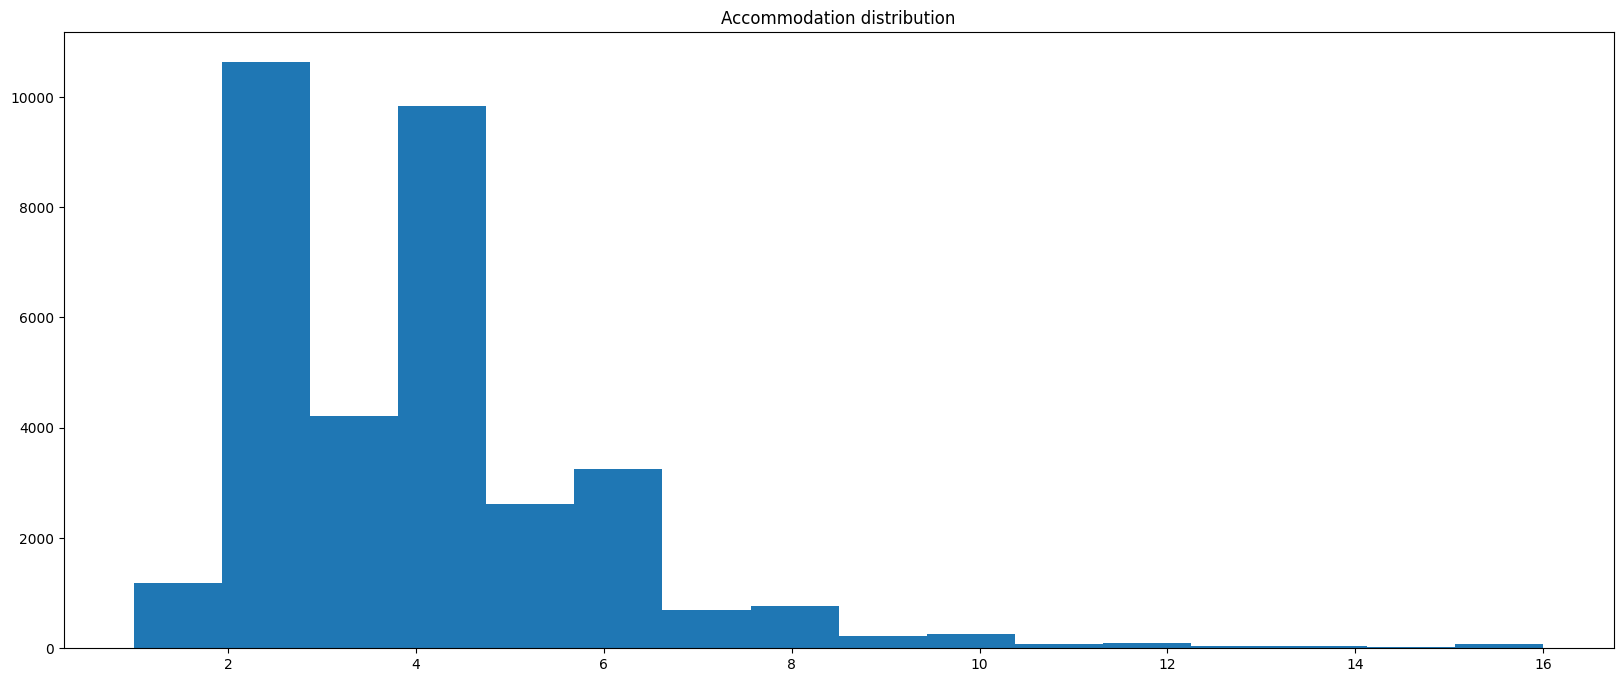

In [249]:
#Se realiza la gráfica de las acomodaciones
plt.figure(figsize=(20, 8))
plt.hist(listings_df["accommodates"], bins=max(listings_df["accommodates"]))
plt.title('Accommodation distribution')
plt.plot()


La tercera variable a evaluar, es la de las acomodaciones, dado que es importante tener amoblado de forma adecuada la propiedad, para que así esta sea más atractiva y más rentada.
Como se puede ver en las líneas anteriores del código, se tiene un promedio de 3.7, y al menos el 75% ofrecen acomodación de máximo 4 personas. Adicional, en la gráfica podemos ver que la acomodación de 2 personas es la de mayor frecuencia.
Tipo de dato: entero

In [191]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [192]:
#Se calcula el porcentaje de datos no disponibles para la variable precio
listings_df["price"].isnull().mean() * 100

11.053697777516808

In [193]:
#Se realiza imputación con la mediana ya que el 11% de los datos no están disponibles.
listings_df.fillna({'price_float':listings_df['price_float'].median()}, inplace=True)

[]

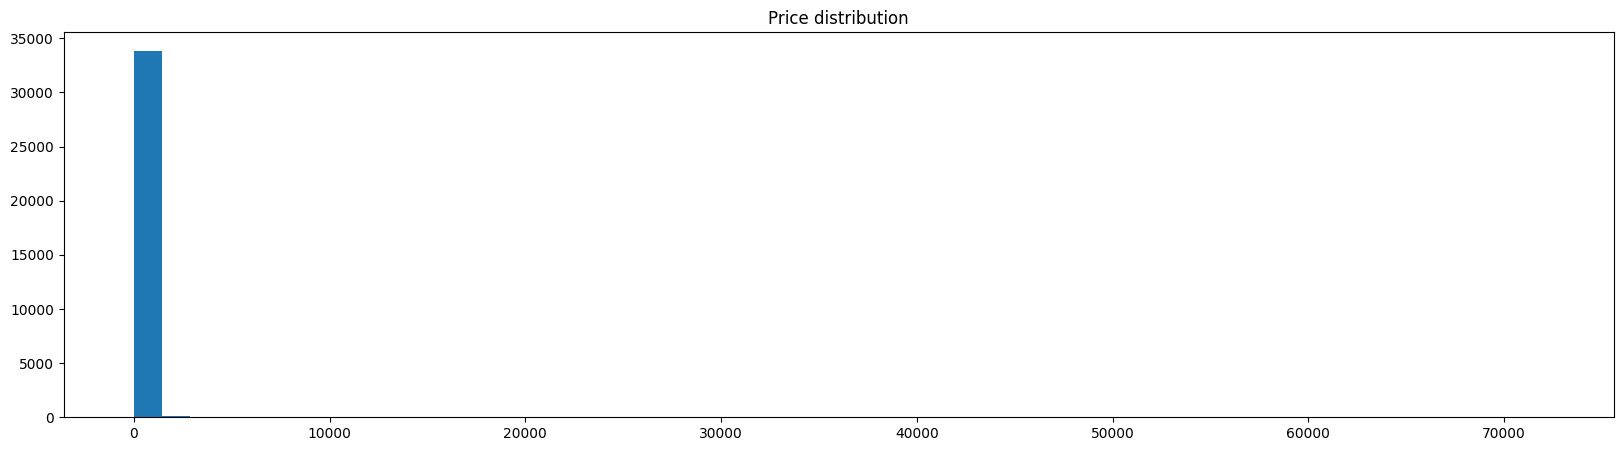

In [194]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [195]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

In [210]:
listings_df['price_float'].mean()

205.3416811015531

[]

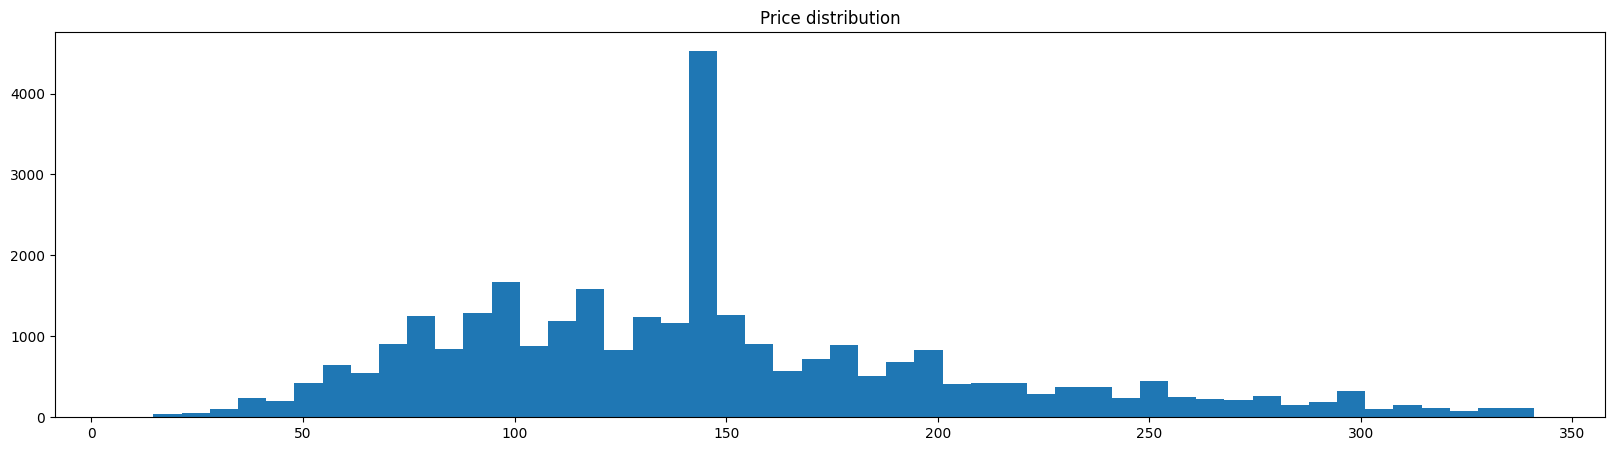

In [196]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

La cuarta variable a evaluar es el precio, dado que es fundamental para calcular la rentabilidad del negocio.
Dado que más del 5% de los datos, 11% aproximadamente estaban vacíos, fue necesario hacer imputación con la mediana (dado que es la más recomendada ante distribuciones sesgadas, como se puede notar en la gráfica). Teniendo en cuanta esto, se calculó que la media del precio es de 205 euros aproximadamente.

In [234]:
#Se calcula el porcentaje de datos no disponibles para la variable review_scores_rating
listings_df["review_scores_rating"].isnull().mean() * 100

14.890930976776959

[]

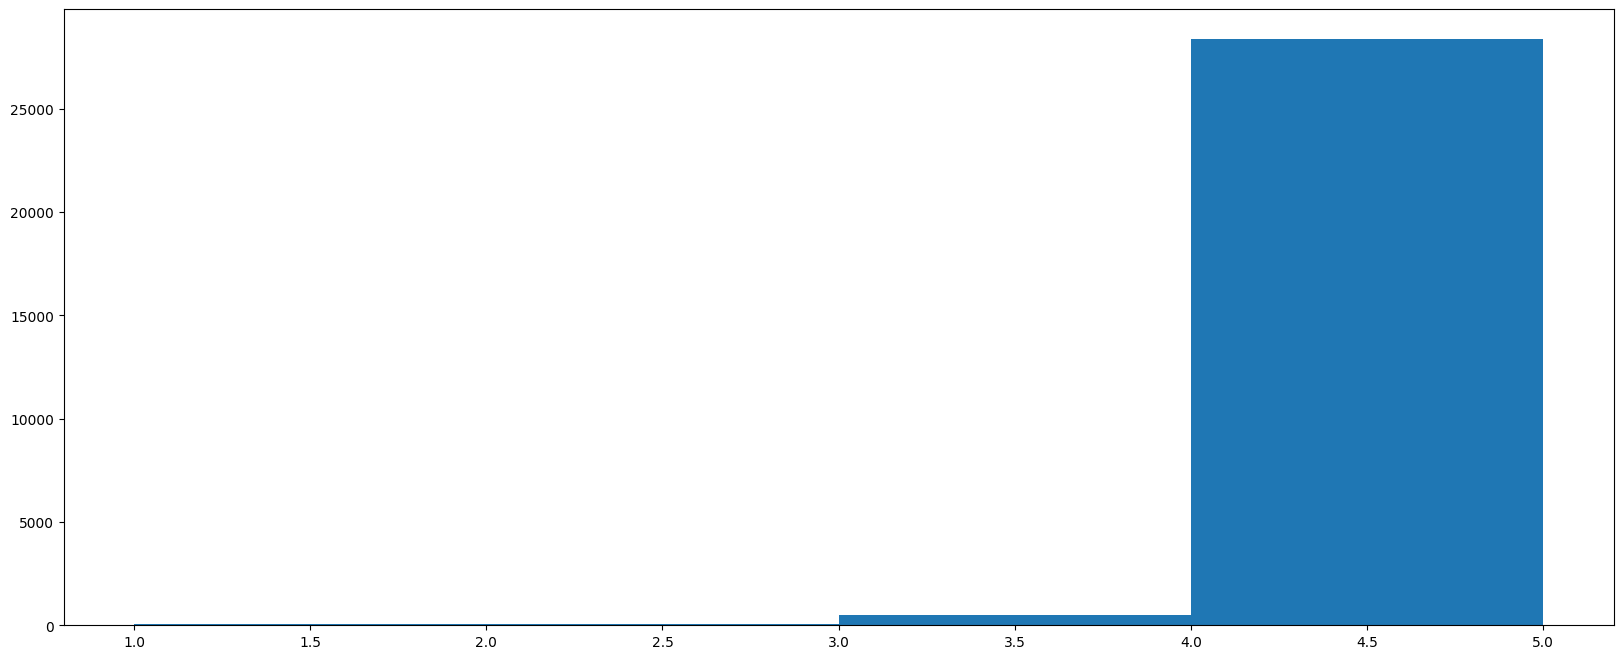

In [233]:
# Plotting a boxplot for Number of reviews
plt.figure(figsize=(20, 8))
plt.hist(listings_df["review_scores_rating"], 4)
plt.plot()


La quinta variable por evaluar es el de las calificaciones, dado que es un indicador de la calidad de servicio que tiene la competencia y así evaluar qué factores pueden hacer destacar, y como se puede ver en la gráfica, las puntuaciones casi en su totalidad están entre 4 y 5.
Nota: El porcentaje de datos faltantes es aproximadamente el 15%, sin embargo, no se realiza imputación por el tipo de variable que se está evaluando y los posibles sesgos que podría causar esa imputación.

## 2. Bivariate analysis

Punto 3
Estrategia: Se evaluará la relación que tienen las variables, con el fin de encontrar patrones, por ejemplo el desglose de la calificación total teniendo en cuenta sus componentes (se realiza graficando la correlacion heatmap que nos muestra a modo de matriz y con una escala de colores, la relacón entre varias variables), la relación entre el precio con la calificación (se realiza una gráfica de puntos dado que se busca tener el mayor detalle de los valores atipicos), la frecuencia de renta en cada vecindario (realizando un análisis de Pareto que nos permite evaluar los vecindarios con mayor frecuencia), el precio con el vecindario (con una gráfica de líneas), la relación entre el precio con la calificación (con una gráfica de líneas) y el precio con la acomodación (con un histograma).


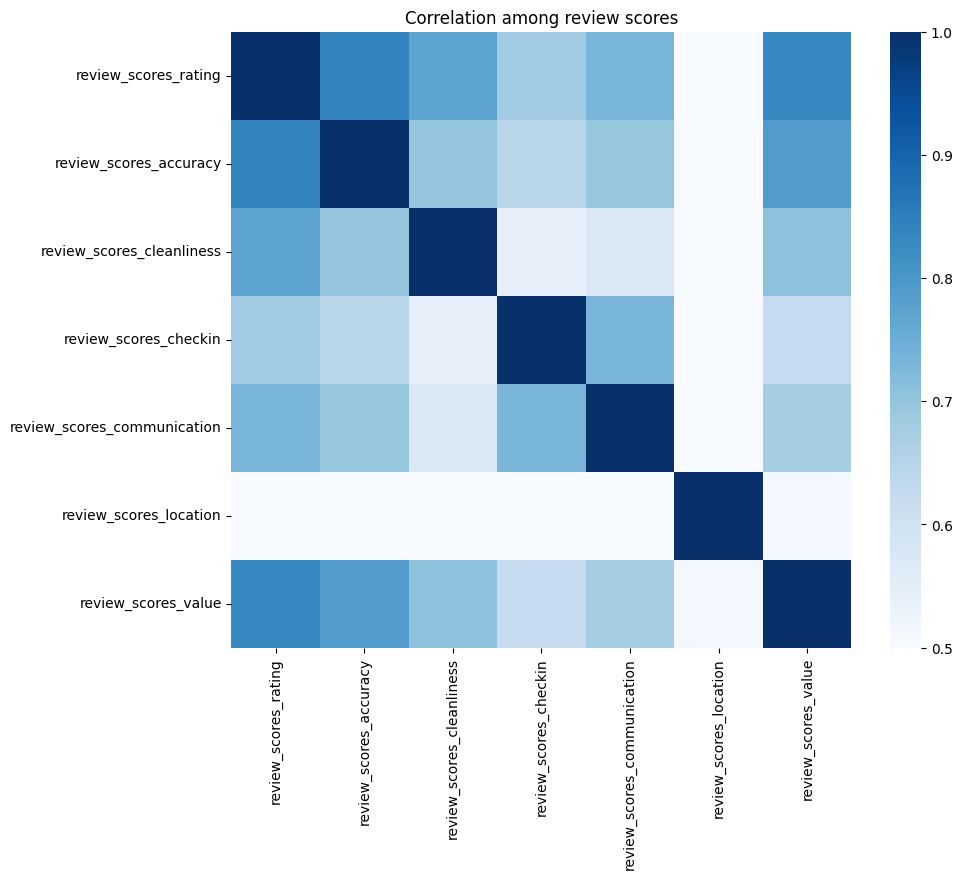

In [235]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

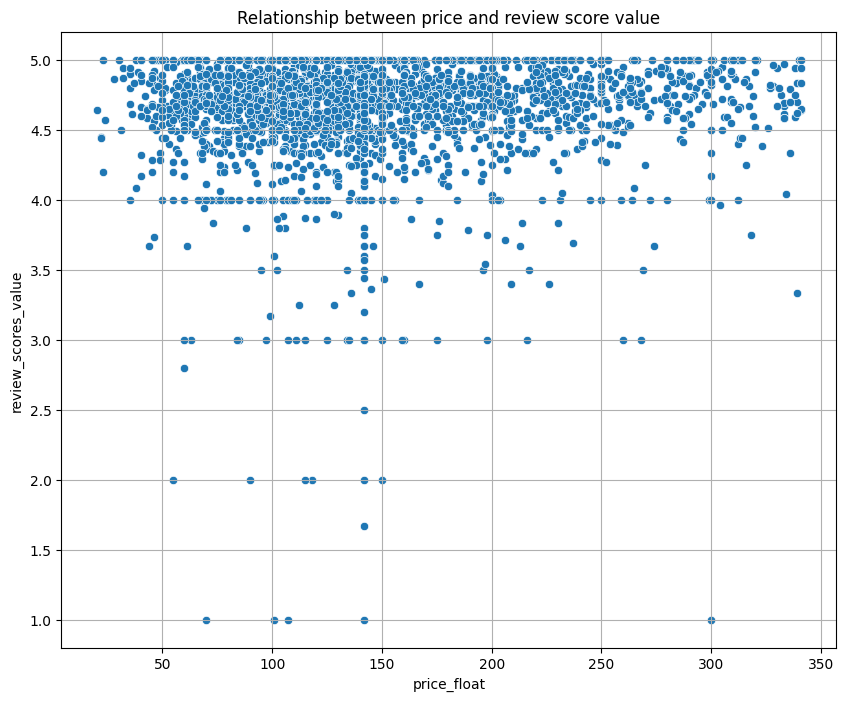

In [236]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [237]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

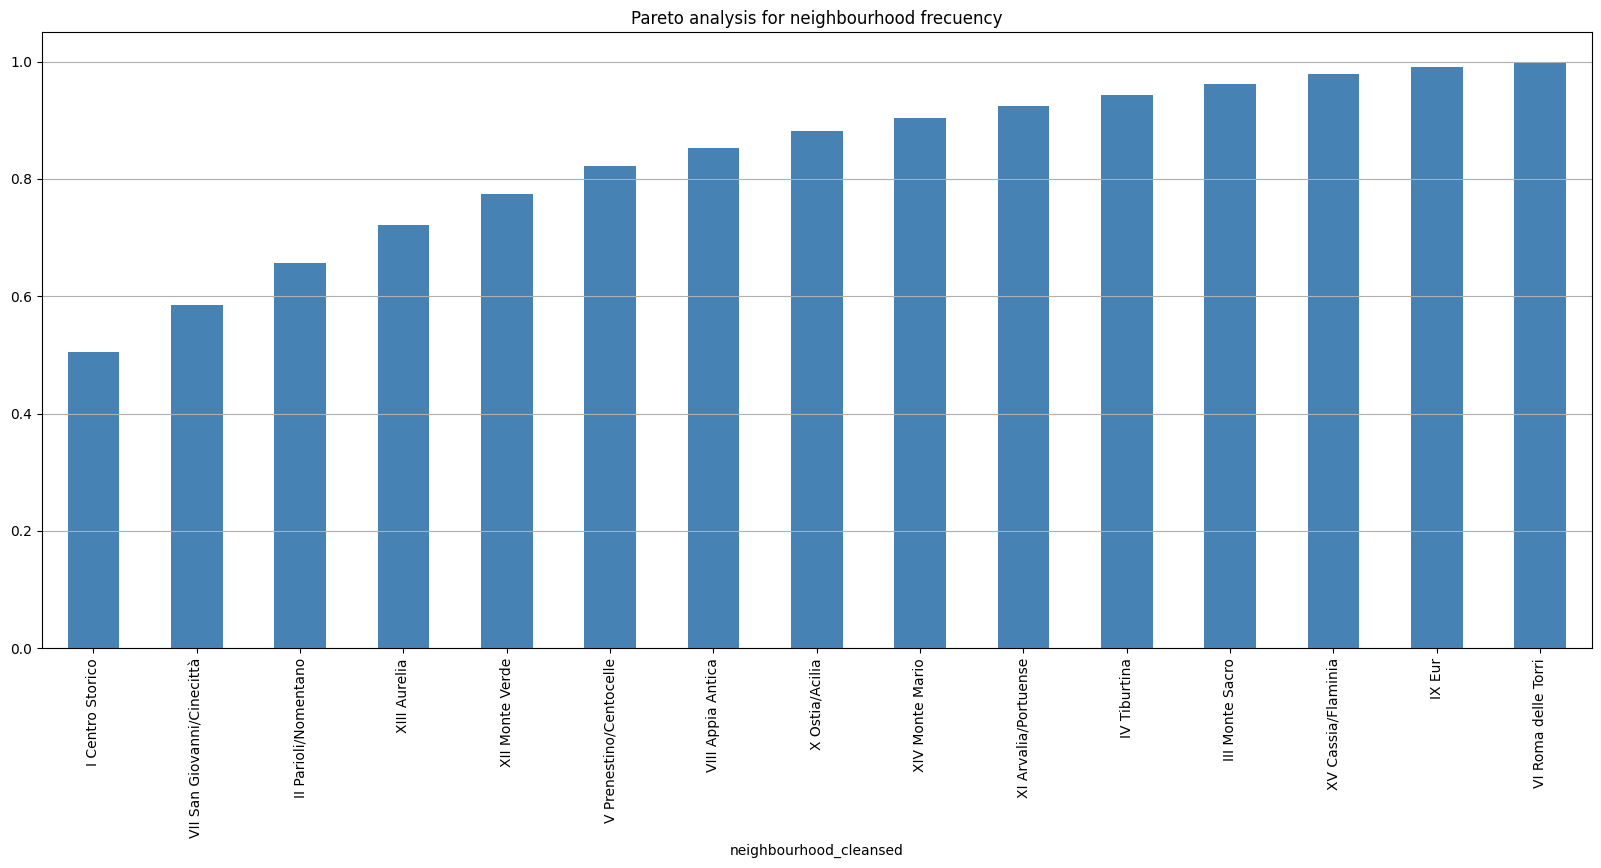

In [238]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [239]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['I Centro Storico',
 'VII San Giovanni/Cinecittà',
 'II Parioli/Nomentano',
 'XIII Aurelia',
 'XII Monte Verde']

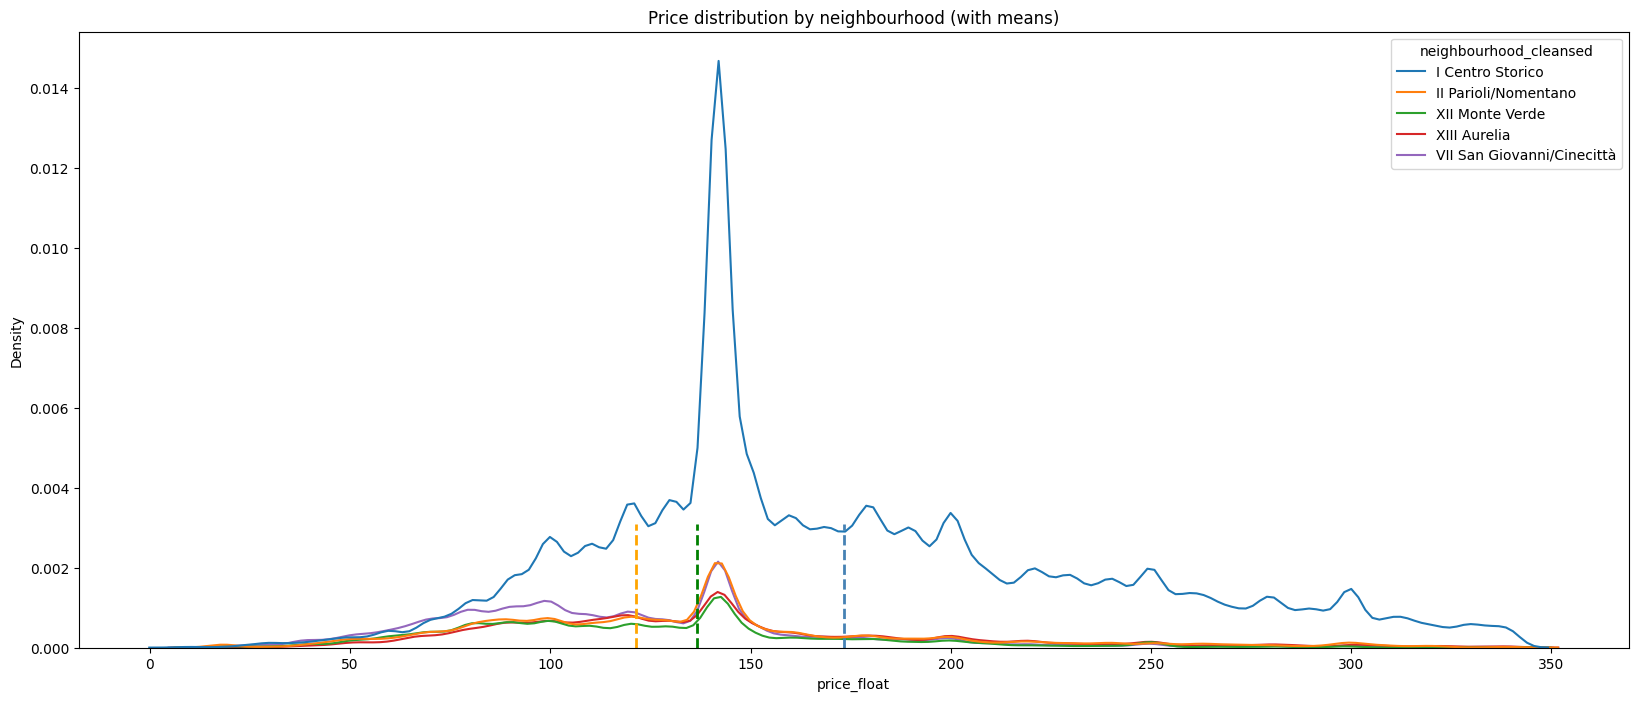

In [241]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

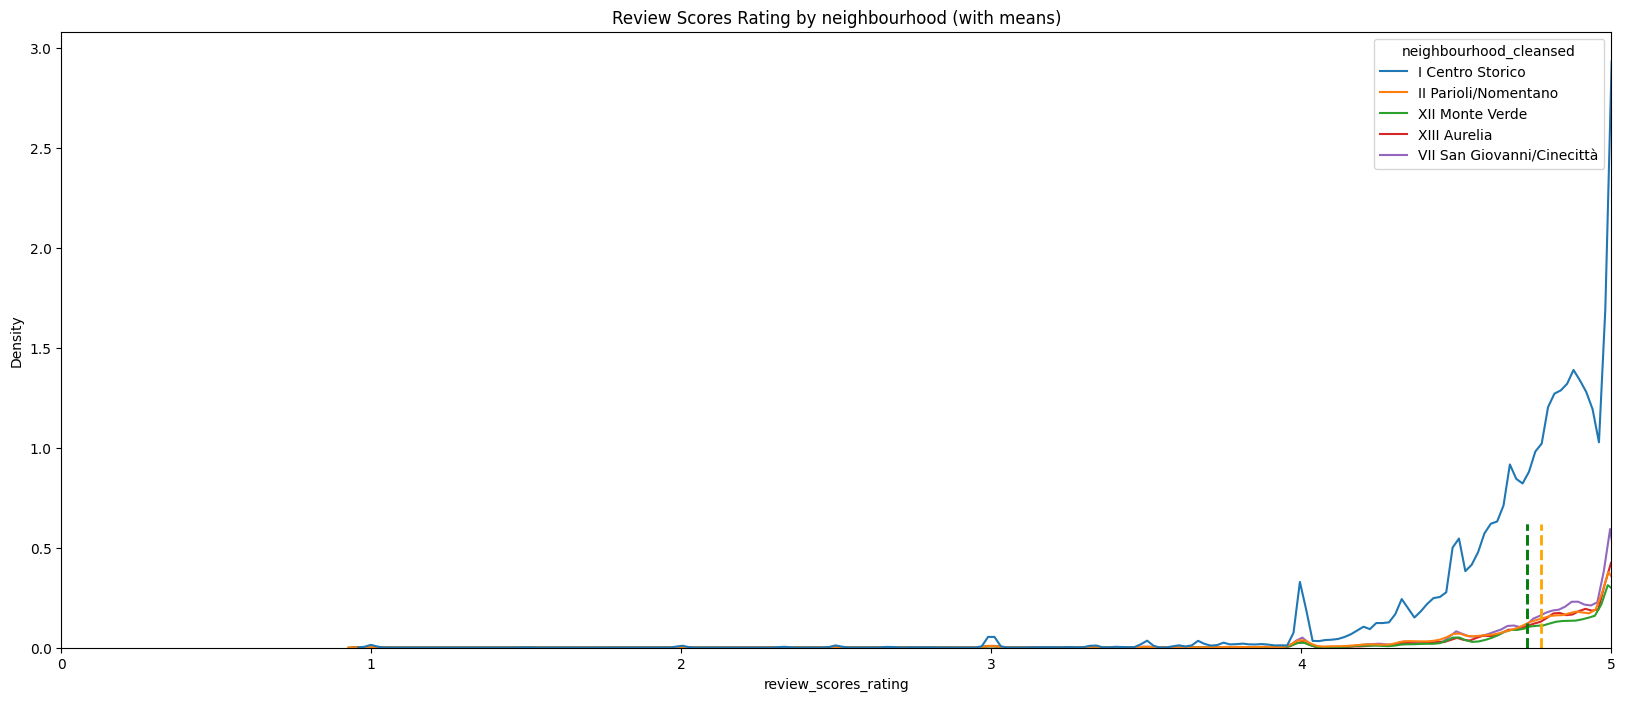

In [243]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="review_scores_rating",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "review_scores_rating"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Review Scores Rating by neighbourhood (with means)")
plt.xlim([0, 5])
plt.show()

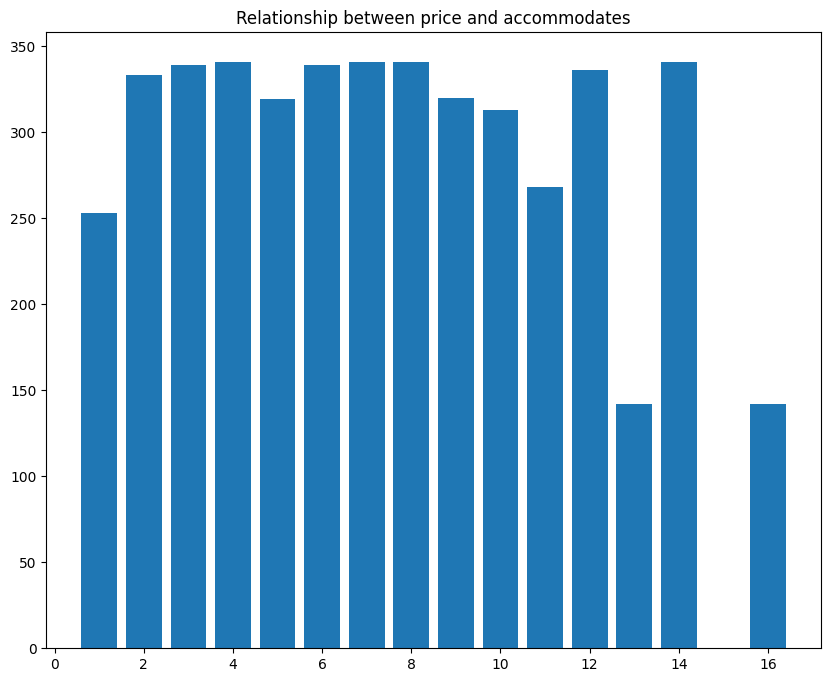

In [248]:
plt.figure(figsize=(10, 8))
plt.title("Relationship between price and accommodates")
plt.bar(listings_sample_df["accommodates"],listings_sample_df["price_float"])
plt.show()